In [1]:
# importing the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


print(f"tensorflow version: {tf.__version__}")

tensorflow version: 1.14.0


In [2]:
# loading dataset
fashion_data = keras.datasets.fashion_mnist

(training_data, training_label), (testing_data, testing_label)= fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# the name of the classes from the offical documentation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#  assuring the shapes is right
print(training_data.shape)
print(training_label.shape)
print(testing_data.shape)
print(testing_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


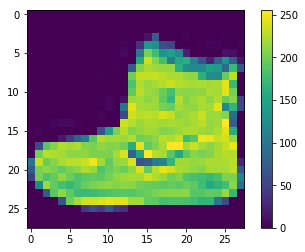

In [5]:
# the data sample
plt.figure()
plt.imshow(training_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

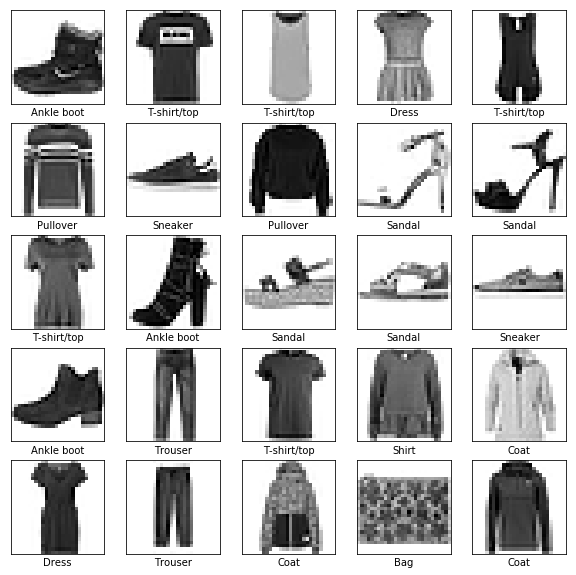

In [6]:
# data samples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_label[i]])
plt.show()

In [0]:
# normalize the data set
training_data, testing_data = training_data/255, testing_data/255

In [0]:
# reshaping the data to fit to the model
training_data =training_data.reshape(60000,28,28,1)
testing_data = testing_data.reshape(10000,28,28,1)

First I will tring Normal NN with 2 convolution layers than 2 dense layer. 
my optimizer will be Adam. <br> my loss is sparse categorical crossentropy because it is 10 classes.
<br> the number of node insyed each layer is pretty small because each picture is only 28x26 pixels.
<br> I used softmax at last layer because it has 10 classes in output layer

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

W0714 21:07:01.886826 140704501688192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 17280)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2211968   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,238,200
Trainable params: 2,238,200
Non-trainable params: 0
______________________________________________

In [11]:
model.fit(training_data,training_label,batch_size=16,validation_split=0.2,verbose=1,epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 316us/sample - loss: 0.5025 - acc: 0.8236 - val_loss: 0.3632 - val_acc: 0.8702
Epoch 2/10
48000/48000 [==============================] - 11s 237us/sample - loss: 0.3392 - acc: 0.8776 - val_loss: 0.3296 - val_acc: 0.8817
Epoch 3/10
48000/48000 [==============================] - 11s 239us/sample - loss: 0.2890 - acc: 0.8951 - val_loss: 0.2989 - val_acc: 0.8913
Epoch 4/10
48000/48000 [==============================] - 11s 238us/sample - loss: 0.2545 - acc: 0.9067 - val_loss: 0.2817 - val_acc: 0.8950
Epoch 5/10
48000/48000 [==============================] - 11s 234us/sample - loss: 0.2254 - acc: 0.9165 - val_loss: 0.2596 - val_acc: 0.9071
Epoch 6/10
48000/48000 [==============================] - 11s 234us/sample - loss: 0.1994 - acc: 0.9275 - val_loss: 0.2582 - val_acc: 0.9057
Epoch 7/10
48000/48000 [==============================] - 11s 232us/sample - loss: 0.1756 - acc: 0.9358 

Text(0.5, 0, 'epoch')

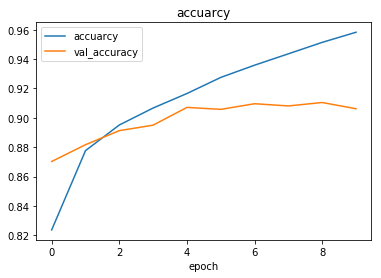

In [12]:
# ploting the result
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

the quick and dirty model actually did great 
with starting at 81% accuarcy and reaching to 94% training accuarcy and 91% validation accuarcy not bad.
the time to converge is 4 epochs.

now I will try model with Batch normalization. I choosed batch size 16 which is very low but I did that in porpuse because the batch norm do some regularization and if the batch is great it cancel out the regularization.

In [0]:
batch_norm_model = keras.Sequential()
batch_norm_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
batch_norm_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
batch_norm_model.add(keras.layers.Flatten())
batch_norm_model.add(keras.layers.Dense(128))
batch_norm_model.add(keras.layers.BatchNormalization())
batch_norm_model.add(keras.layers.Activation(tf.nn.relu))
batch_norm_model.add(keras.layers.Dense(128))
batch_norm_model.add(keras.layers.BatchNormalization())
batch_norm_model.add(keras.layers.Activation(tf.nn.relu))
batch_norm_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

batch_norm_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
batch_norm_model.fit(training_data,training_label,batch_size=32,validation_split=0.2,verbose=1,epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 201us/sample - loss: 0.4280 - acc: 0.8556 - val_loss: 0.2919 - val_acc: 0.8963
Epoch 2/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.2518 - acc: 0.9115 - val_loss: 0.2656 - val_acc: 0.9049
Epoch 3/10
48000/48000 [==============================] - 9s 191us/sample - loss: 0.1799 - acc: 0.9385 - val_loss: 0.2527 - val_acc: 0.9103
Epoch 4/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.1234 - acc: 0.9591 - val_loss: 0.2584 - val_acc: 0.9113
Epoch 5/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0828 - acc: 0.9735 - val_loss: 0.2680 - val_acc: 0.9125
Epoch 6/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.0560 - acc: 0.9832 - val_loss: 0.2978 - val_acc: 0.9072
Epoch 7/10
48000/48000 [==============================] - 9s 190us/sample - loss: 0.0392 - acc: 0.9888 - val_

Text(0.5, 0, 'epoch')

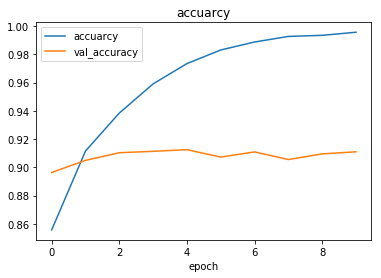

In [16]:
plt.plot(batch_norm_model.history.history['acc'])
plt.plot(batch_norm_model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

the validation accuracy is 91% like the first model but the accuarcy of training is 99 so clearly the model over fitted the data. 
the model converged faster than the the first model only 3 epochs. <br>
I will run this model again with only 3 epochs to avoid over fitting.

In [17]:
batch_norm_model = keras.Sequential()
batch_norm_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
batch_norm_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
batch_norm_model.add(keras.layers.Flatten())
batch_norm_model.add(keras.layers.Dense(128))
batch_norm_model.add(keras.layers.BatchNormalization())
batch_norm_model.add(keras.layers.Activation(tf.nn.relu))
batch_norm_model.add(keras.layers.Dense(128))
batch_norm_model.add(keras.layers.BatchNormalization())
batch_norm_model.add(keras.layers.Activation(tf.nn.relu))
batch_norm_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

batch_norm_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

batch_norm_model.fit(training_data,training_label,batch_size=32,validation_split=0.2,verbose=1,epochs=3)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 10s 213us/sample - loss: 0.4299 - acc: 0.8574 - val_loss: 0.2877 - val_acc: 0.8973
Epoch 2/3
48000/48000 [==============================] - 10s 202us/sample - loss: 0.2606 - acc: 0.9094 - val_loss: 0.2675 - val_acc: 0.9021
Epoch 3/3
48000/48000 [==============================] - 10s 200us/sample - loss: 0.1882 - acc: 0.9343 - val_loss: 0.2558 - val_acc: 0.9070


<br><br><br>

Now i will try with drop out after each conv layer.

In [0]:
Drop_out_model = keras.Sequential()
Drop_out_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
Drop_out_model.add(keras.layers.Dropout(0.5))
Drop_out_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
Drop_out_model.add(keras.layers.Dropout(0.5))
Drop_out_model.add(keras.layers.Flatten())
Drop_out_model.add(keras.layers.Dense(128,activation=tf.nn.relu))
Drop_out_model.add(keras.layers.Dense(128,activation=tf.nn.relu))
Drop_out_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

Drop_out_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [19]:
Drop_out_model.fit(training_data,training_label,batch_size=32,validation_split=0.2,verbose=1,epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 155us/sample - loss: 0.6250 - acc: 0.7746 - val_loss: 0.4835 - val_acc: 0.8286
Epoch 2/10
48000/48000 [==============================] - 7s 149us/sample - loss: 0.4353 - acc: 0.8436 - val_loss: 0.3770 - val_acc: 0.8677
Epoch 3/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.3783 - acc: 0.8625 - val_loss: 0.3638 - val_acc: 0.8717
Epoch 4/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.3400 - acc: 0.8765 - val_loss: 0.3208 - val_acc: 0.8842
Epoch 5/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.3140 - acc: 0.8842 - val_loss: 0.2979 - val_acc: 0.8925
Epoch 6/10
48000/48000 [==============================] - 7s 146us/sample - loss: 0.2943 - acc: 0.8912 - val_loss: 0.3006 - val_acc: 0.8899
Epoch 7/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.2740 - acc: 0.8988 - val_l

Text(0.5, 0, 'epoch')

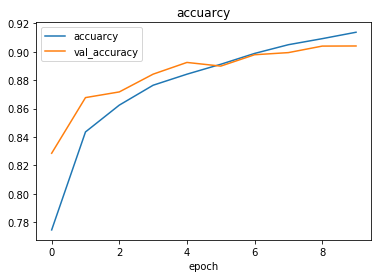

In [20]:
plt.plot(Drop_out_model.history.history['acc'])
plt.plot(Drop_out_model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

the drop out is not much helpful at converging time 
but it did great at reducing the over fitting.
<br> now I will try model with both dropout and batch norm

In [23]:
DropAndbatch_model = keras.Sequential()
DropAndbatch_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
DropAndbatch_model.add(keras.layers.Dropout(0.5))
DropAndbatch_model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
DropAndbatch_model.add(keras.layers.Dropout(0.5))
DropAndbatch_model.add(keras.layers.Flatten())
DropAndbatch_model.add(keras.layers.Dense(128))
DropAndbatch_model.add(keras.layers.BatchNormalization())
DropAndbatch_model.add(keras.layers.Activation(tf.nn.relu))
DropAndbatch_model.add(keras.layers.Dense(128))
DropAndbatch_model.add(keras.layers.BatchNormalization())
DropAndbatch_model.add(keras.layers.Activation(tf.nn.relu))
DropAndbatch_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

DropAndbatch_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
DropAndbatch_model.fit(training_data,training_label,batch_size=16,validation_split=0.2,verbose=1,epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 391us/sample - loss: 0.6573 - acc: 0.7722 - val_loss: 0.3857 - val_acc: 0.8589
Epoch 2/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.4229 - acc: 0.8494 - val_loss: 0.3393 - val_acc: 0.8750
Epoch 3/10
48000/48000 [==============================] - 18s 382us/sample - loss: 0.3602 - acc: 0.8698 - val_loss: 0.2926 - val_acc: 0.8921
Epoch 4/10
48000/48000 [==============================] - 19s 391us/sample - loss: 0.3218 - acc: 0.8838 - val_loss: 0.2707 - val_acc: 0.8997
Epoch 5/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.2957 - acc: 0.8913 - val_loss: 0.2665 - val_acc: 0.9029
Epoch 6/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.2717 - acc: 0.9013 - val_loss: 0.2475 - val_acc: 0.9086
Epoch 7/10
48000/48000 [==============================] - 19s 394us/sample - loss: 0.2558 - acc: 0.9062 

Text(0.5, 0, 'epoch')

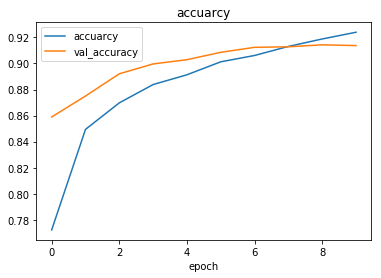

In [24]:
plt.plot(DropAndbatch_model.history.history['acc'])
plt.plot(DropAndbatch_model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

It converges slower but no overfitting so i am satisfied.
<br><br>



I did't understand well "try using differnet techniques in updating learning rate during the training "
but Adam optimizer which I used is already doing this. 
there is another way with usese the updating called adaptive learning rate optimizer on SGD
I will try it next 

In [0]:
SGD = keras.Sequential()
SGD.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
SGD.add(keras.layers.Dropout(0.5))
SGD.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
SGD.add(keras.layers.Dropout(0.5))
SGD.add(keras.layers.Flatten())
SGD.add(keras.layers.Dense(128))
SGD.add(keras.layers.BatchNormalization())
SGD.add(keras.layers.Activation(tf.nn.relu))
SGD.add(keras.layers.Dense(128))
SGD.add(keras.layers.BatchNormalization())
SGD.add(keras.layers.Activation(tf.nn.relu))
SGD.add(keras.layers.Dense(10,activation=tf.nn.softmax))

SGD.compile(optimizer=keras.optimizers.Adagrad(initial_accumulator_value=0.2),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [26]:
SGD.fit(training_data,training_label,batch_size=32,validation_split=0.2,verbose=1,epochs=20)

Train on 48000 samples, validate on 12000 samples


W0714 21:29:59.521666 140704501688192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/20
48000/48000 [==============================] - 10s 219us/sample - loss: 0.9670 - acc: 0.6700 - val_loss: 0.6499 - val_acc: 0.7680
Epoch 2/20
48000/48000 [==============================] - 10s 208us/sample - loss: 0.7095 - acc: 0.7488 - val_loss: 0.5630 - val_acc: 0.7987
Epoch 3/20
48000/48000 [==============================] - 10s 207us/sample - loss: 0.6430 - acc: 0.7711 - val_loss: 0.5292 - val_acc: 0.8092
Epoch 4/20
48000/48000 [==============================] - 10s 206us/sample - loss: 0.5995 - acc: 0.7855 - val_loss: 0.5032 - val_acc: 0.8186
Epoch 5/20
48000/48000 [==============================] - 10s 206us/sample - loss: 0.5689 - acc: 0.7974 - val_loss: 0.4767 - val_acc: 0.8317
Epoch 6/20
48000/48000 [==============================] - 10s 208us/sample - loss: 0.5413 - acc: 0.8088 - val_loss: 0.4580 - val_acc: 0.8372
Epoch 7/20
48000/48000 [==============================] - 10s 205us/sample - loss: 0.5202 - acc: 0.8154 - val_loss: 0.4435 - val_acc: 0.8425
Epoch 8/20
48

Text(0.5, 0, 'epoch')

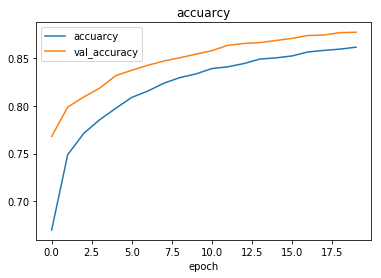

In [27]:
plt.plot(SGD.history.history['acc'])
plt.plot(SGD.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')

I used here 20 epochs instead of 10 because it converge slower than adam optimizer so I will stick with adam optimizer.
also it cloud reach the accuracy of adam if I tried more epochs but it is not far away behiend and it is start to enhance really slow so it may take more than 50 other epochs to get the accuarcy of adam.
<br>
<br>
<br>

Now I will try different batch sizes.
Note if the batch size incressed the effect of regualization that is happend by batch norm will decressies.
<br>spolier alert the bigger the batch size the slower the algorithom on converging but it is faster on time spend on each epoch.
if the batch size decresses the fastest it will converge but the slowest of each epochs.

In [0]:
def Model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(tf.nn.relu))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(tf.nn.relu))
    model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

    model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
    return model

In [30]:
output_history=[]
batch_sizes = [16,32,64,128,256]
for i in batch_sizes:
  m = Model()
  m.fit(training_data,training_label,batch_size=i,validation_split=0.2,verbose=1,epochs=10)
  output_history.append(m.history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 410us/sample - loss: 0.6513 - acc: 0.7728 - val_loss: 0.3848 - val_acc: 0.8593
Epoch 2/10
48000/48000 [==============================] - 19s 393us/sample - loss: 0.4235 - acc: 0.8483 - val_loss: 0.3279 - val_acc: 0.8792
Epoch 3/10
48000/48000 [==============================] - 19s 392us/sample - loss: 0.3616 - acc: 0.8691 - val_loss: 0.2931 - val_acc: 0.8927
Epoch 4/10
48000/48000 [==============================] - 19s 385us/sample - loss: 0.3229 - acc: 0.8826 - val_loss: 0.2664 - val_acc: 0.9013
Epoch 5/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.2963 - acc: 0.8925 - val_loss: 0.2603 - val_acc: 0.9032
Epoch 6/10
48000/48000 [==============================] - 19s 397us/sample - loss: 0.2762 - acc: 0.9001 - val_loss: 0.2480 - val_acc: 0.9082
Epoch 7/10
48000/48000 [==============================] - 19s 394us/sample - loss: 0.2566 - acc: 0.9053 

it semmes like 64 if the more suitable in fastest and still get the accuarcy high





In [0]:
final_model = Model()

In [35]:
final_model.fit(training_data,training_label,batch_size=64,validation_split=0.2,verbose=1,epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.6911 - acc: 0.7609 - val_loss: 0.4408 - val_acc: 0.8447
Epoch 2/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.4233 - acc: 0.8502 - val_loss: 0.3517 - val_acc: 0.8702
Epoch 3/10
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3578 - acc: 0.8731 - val_loss: 0.3121 - val_acc: 0.8865
Epoch 4/10
48000/48000 [==============================] - 6s 122us/sample - loss: 0.3224 - acc: 0.8829 - val_loss: 0.2916 - val_acc: 0.8923
Epoch 5/10
48000/48000 [==============================] - 6s 123us/sample - loss: 0.2922 - acc: 0.8949 - val_loss: 0.2692 - val_acc: 0.9015
Epoch 6/10
48000/48000 [==============================] - 6s 122us/sample - loss: 0.2733 - acc: 0.8990 - val_loss: 0.2640 - val_acc: 0.9024
Epoch 7/10
48000/48000 [==============================] - 6s 121us/sample - loss: 0.2541 - acc: 0.9066 - val_l

In [36]:
final_model.evaluate(testing_data,testing_label)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.2475 - acc: 0.9105


[0.24753672078847885, 0.9105]

no over fitting it is doing great on test data <br> <br>

Text(0.5, 0, 'epoch')

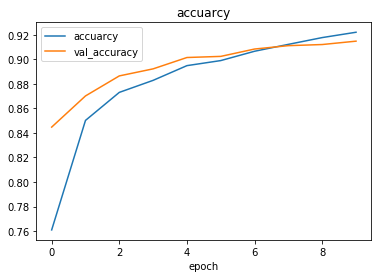

In [37]:
plt.plot(final_model.history.history['acc'])
plt.plot(final_model.history.history['val_acc'])
plt.legend(['accuarcy','val_accuracy'])
plt.title('accuarcy')
plt.xlabel('epoch')